<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/AerofitCaseStudy_Mariya_DSMLJune22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aerofit Case Study**


# **1. Objective**
## Identify the customer characteristics for each type of treadmill offered by Aerofit, so as to provide a better recommendation to the new customers.

## Importing the Packages

In [ ]:
# import required librariies & packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson

## Import and read the dataset

In [ ]:
# import dataset

dataset_url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749"
aero_df = pd.read_csv(dataset_url)

# **2. Statistical Summary**
## List the data properties

#### Basic info of the dataset

In [ ]:
# Basic info of the dataset
aero_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### Description of the dataset

In [ ]:
# Description of the dataset
aero_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


#### Size of the dataset

In [ ]:
# Size of the dataset
aero_df.size

1620

#### Shape of the dataset

In [ ]:
# Shape of the dataset
aero_df.shape

(180, 9)

##### Shape of the dataset shows there are 180 records with 9 attributes

#### Columns/Product Attributes

In [ ]:
# Column names in the dataset
aero_df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

##### the 9 attributes of the given dataset are - Product, Age, Gender, Education, Marital Status, Usage, Fitness, Income and Miles. These attributes will help to identify the characterisitcs associated with each Product.

#### Data Types of Product Attributes

In [ ]:
# Data types of all the attributes
aero_df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

#### Top 5 rows of dataset

In [ ]:
# top 5 rows from the dataset
aero_df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#### Bottom 5 rows of dataset

In [ ]:
# bottom 5 rows
aero_df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


# **3. Data Pre-processing**
## Data Preparation

#### Check for Null Values

In [ ]:
# Check for Null values
aero_df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

##### The above result indicates that, there is no null value for any attribute in the given dataset, which is good. 

#### Data Types & Sanctity

##### The Usage and Fitness attribute values don't indicate anything significant  

# **4. Exploratory Data Analysis**
## Graphical & non-graphical analysis of Uni & Bi variate elements

#### Count by Products

In [ ]:
# Count of each products
product_cnt = {'Products Count ' : aero_df['Product'].value_counts()}
product_cnt = pd.DataFrame(product_cnt)
product_cnt

,Products Count
KP281,80
KP481,60
KP781,40


#### *As we can see, KP281 is sold more and KP781 is sold less amongst three products*

#### Customers count by Age

In [ ]:
# Customers count by age group
age_group_cnt = {'Age Count': aero_df['Age'].value_counts()}
age_group_cnt = pd.DataFrame(age_group_cnt)
age_group_cnt

,Age Count
25,25
23,18
24,12
26,12
28,9
35,8
33,8
30,7
38,7
21,7


#### *The above result indicates that the most popular age group which purchased threadmill is between 23 & 26*

In [ ]:
#### Customers count by Gender

In [ ]:
# Customers by Gender
gender_cnt = {'Male Female': aero_df['Gender'].value_counts()}
gender_cnt = pd.DataFrame(gender_cnt)
gender_cnt

,Male Female
Male,104
Female,76


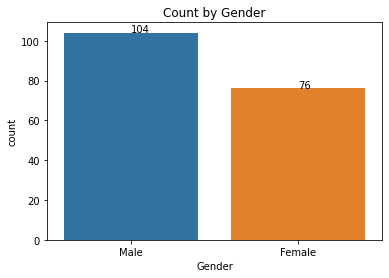

In [ ]:
ax = sns.countplot(data=aero_df, x='Gender')
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.40, p.get_height()+0.05))
plt.title("Count by Gender")
plt.show()

#### *From the buyers list the Male community is large in number than Females*

#### Customers count by Marital Status

In [ ]:
# Customers count by their marital status
marital_status_cnt = aero_df['MaritalStatus'].value_counts()
marital_status_cnt

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

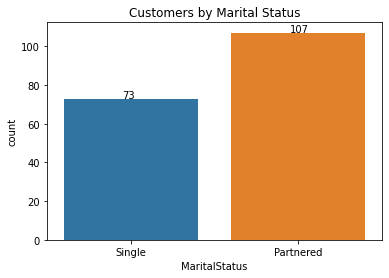

In [ ]:
ax = sns.countplot(data=aero_df, x='MaritalStatus')
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))
plt.title('Customers by Marital Status')
plt.show()

#### *Interestingly 'Partnered' seem to have purchased the Threadmill more than the Singles*

In [ ]:
mari_status_gender = aero_df.groupby('Gender')['MaritalStatus'].value_counts()
temp_df = pd.DataFrame(mari_status_gender)
mari_status_gender

Gender  MaritalStatus
Female  Partnered        46
        Single           30
Male    Partnered        61
        Single           43
Name: MaritalStatus, dtype: int64

#### *About 61% females who are partnered have purchased Threadmills. Similarly amongst partnered males percentage is: 59. Amongst the Singles - Male Vs Female percentages are 41% and 39%. This indicates that purchase of Threadmill is higher amonghs male singles compared to female singles; wherease it becomes reverse amongnst 'partnered' community*

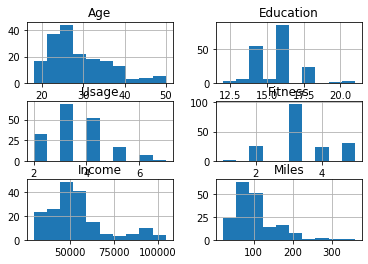

In [ ]:
aero_df.hist()
plt.show()

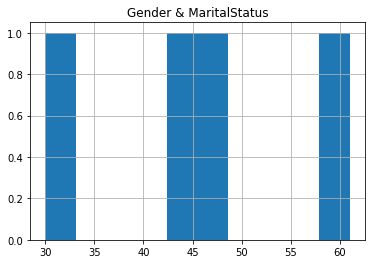

In [ ]:
ax = mari_status_gender.hist()
plt.title("Gender & MaritalStatus")
plt.show()

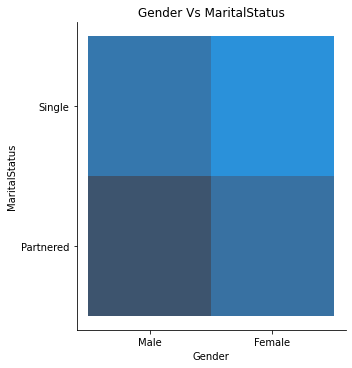

In [ ]:
sns.displot(data=aero_df, x='Gender', y='MaritalStatus')
plt.title('Gender Vs MaritalStatus')
plt.show()

In [ ]:
# Usage Count
usage_count = aero_df['Usage'].value_counts()
usage_count

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

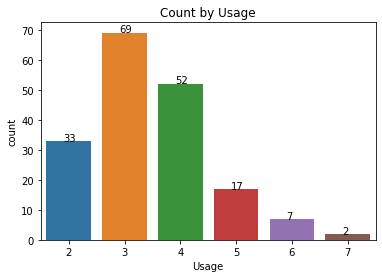

In [ ]:
ax = sns.countplot(data=aero_df, x='Usage')
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.30, p.get_height()+0.03))
plt.title('Count by Usage')
plt.show()

#### *Usage of 3 or 4 times per day is higher.*

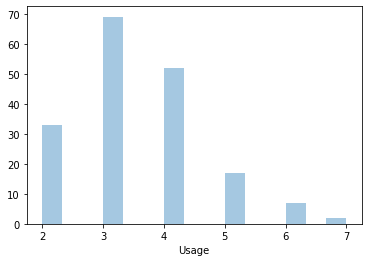

In [ ]:
usage_df = aero_df['Usage']
sns.distplot(usage_df, kde=False)

#### *Usage Units - Assuming the given Usage numbers are of number of times usage per day, majority of the customers use 3 times.*

In [ ]:
# KP281 Product by Usage
KP1_Usage = {'Usage Count': aero_df[aero_df['Product']=='KP281']['Usage'].value_counts()}
KP1_Usage_df = pd.DataFrame(KP1_Usage)
KP1_Usage_df

,Usage Count
3,37
4,22
2,19
5,2


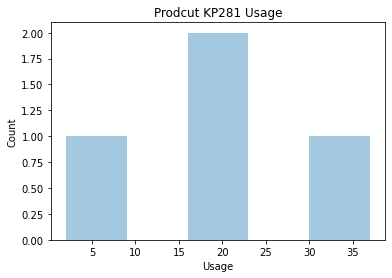

In [ ]:
sns.distplot(KP1_Usage_df, bins=5, kde=False)
plt.title("Prodcut KP281 Usage")
plt.xlabel("Usage")
plt.ylabel('Count')

plt.show()

In [ ]:
# KP481 Product by Usage
KP2_Usage = {'Usage Count': aero_df[aero_df['Product']=='KP481']['Usage'].value_counts()}
KP2_Usage_df = pd.DataFrame(KP2_Usage)
KP2_Usage_df

,Usage Count
3,31
2,14
4,12
5,3


In [ ]:
# KP781 Product by Usage
KP3_Usage = {'Usage Count': aero_df[aero_df['Product']=='KP781']['Usage'].value_counts()}
KP3_Usage_df = pd.DataFrame(KP3_Usage)
KP3_Usage_df

,Usage Count
4,18
5,12
6,7
7,2
3,1


#### *Interestingly the product KP781 is used 4 or more times a day, but that's the one lowest number sold. The other two products are sold in high numbers but mostly used 3 times a day.*

In [ ]:
# Top 10 users of the product KP281 by Age
top10_KP1 = {'Age Count': aero_df[aero_df['Product']=='KP281']['Age'].value_counts()}
top10_KP1_df = pd.DataFrame(top10_KP1)
top10_KP1_df.head(10)

,Age Count
23,8
25,7
26,7
28,6
24,5
38,4
21,4
22,4
29,3
19,3


#### *The first product KP281 seems to be popular amongst the age groups 23 to 28.*

In [ ]:
# Top 10 users of the product KP481 by Age
top10_KP2 = {'Age Count': aero_df[aero_df['Product']=='KP481']['Age'].value_counts()}
top10_KP2_df = pd.DataFrame(top10_KP2)
top10_KP2_df.head(10)

,Age Count
25,11
23,7
33,5
35,4
31,3
21,3
24,3
26,3
40,3
20,3


#### *The second product KP481 seems to be popular amongst the age groups 25 and 23.*

In [ ]:
# Top 10 users of the product KP781 by Age
top10_KP3 = {'Age Count': aero_df[aero_df['Product']=='KP781']['Age'].value_counts()}
top10_KP3_df = pd.DataFrame(top10_KP3)
top10_KP3_df.head(10)

,Age Count
25,7
24,4
22,3
27,3
28,3
30,3
23,3
26,2
29,2
40,1


#### *The third product KP781 seems to be popular amongst the age group 25 and 24.*

In [ ]:
# top age group which purchased the threadmils
top_age_group = aero_df[['Product', 'Age']].value_counts()
top_age_group.head(10)

Product  Age
KP481    25     11
KP281    23      8
KP481    23      7
KP281    25      7
         26      7
KP781    25      7
KP281    28      6
KP481    33      5
KP281    24      5
         38      4
dtype: int64

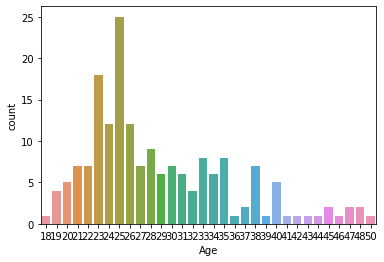

In [ ]:
sns.countplot(data=aero_df, x="Age")
plt.show()

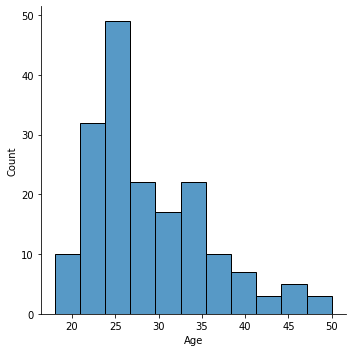

In [ ]:
from pandas.core.ops.dispatch import Any
sns.displot(data=aero_df, x='Age')
plt.show()

#### *This indicates that generally threadmills are mostly bought by the age groups between 23 to 28.*

In [ ]:
# Top 10 users of KP281 by gender & by Age
count_by_gender = aero_df[aero_df['Product']=='KP281']['Gender'].value_counts()
count_by_gender_by_age = aero_df[aero_df['Product']=="KP281"][['Gender', 'Age']].sort_values(by='Gender').value_counts()
print("*** KP281 Count by Gender ***\n", count_by_gender)
print()
print("*** KP281 Count by gender & age ***\n", count_by_gender_by_age.head(10))

*** KP281 Count by Gender ***
 Male      40
Female    40
Name: Gender, dtype: int64

*** KP281 Count by gender & age ***
 Gender  Age
Male    23     5
        26     4
Female  25     4
        28     4
Male    25     3
Female  22     3
        23     3
        24     3
        26     3
Male    38     3
dtype: int64


#### *the Product KP281 is equally purchased by both Male & Females. Amongst the Age group for Male it is 23 & 26; for Female it is 25 & 28.*

In [ ]:
# Top 10 users of KP481 by gender & by Age
count_by_gender = aero_df[aero_df['Product']=='KP481']['Gender'].value_counts()
count_by_gender_by_age = aero_df[aero_df['Product']=="KP481"][['Gender', 'Age']].sort_values(by='Gender').value_counts()
print("*** KP281 Count by Gender ***\n", count_by_gender)
print()
print("*** KP281 Count by gender & age ***\n", count_by_gender_by_age.head(10))

*** KP281 Count by Gender ***
 Male      31
Female    29
Name: Gender, dtype: int64

*** KP281 Count by gender & age ***
 Gender  Age
Male    25     6
Female  25     5
Male    23     4
Female  23     3
        33     3
Male    20     2
        35     2
        32     2
        21     2
        33     2
dtype: int64


#### *More Males have purchased the Product KP481 than Females. Amongst the Age group for both Male & Female it is 25 and 23 who purchased in high numbers.*

In [ ]:
# Top 10 users of KP781 by gender & by Age
count_by_gender = aero_df[aero_df['Product']=='KP781']['Gender'].value_counts()
count_by_gender_by_age = aero_df[aero_df['Product']=="KP781"][['Gender', 'Age']].sort_values(by='Gender').value_counts()
print("*** KP281 Count by Gender ***\n", count_by_gender)
print()
print("*** KP281 Count by gender & age ***\n", count_by_gender_by_age.head(10))

*** KP281 Count by Gender ***
 Male      33
Female     7
Name: Gender, dtype: int64

*** KP281 Count by gender & age ***
 Gender  Age
Male    25     6
        27     3
        22     3
        24     3
        23     2
        28     2
        29     2
        30     2
        31     1
        47     1
dtype: int64


#### *Interestingly the product KP781 seems to be highly popular with 75% of Males buying it. Only 25% of females have bought KP781.* 

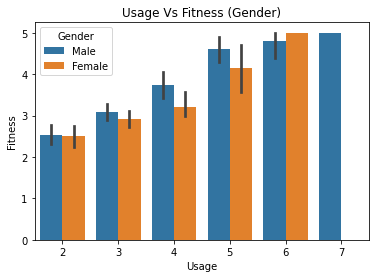

In [ ]:
# Fitness impact due to Usage amongst the Gender
sns.barplot(data=aero_df, x='Usage', y='Fitness', hue='Gender')
plt.title("Usage Vs Fitness (Gender)")
plt.show()

#### *This correleation indicates high usage & fitness is amongst Male community.*

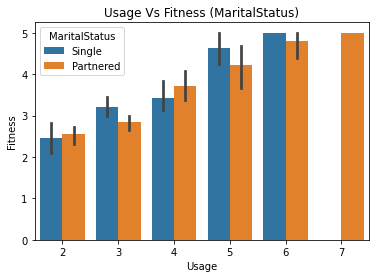

In [ ]:
# Fitness impact due to Usage based on Marital Status
sns.barplot(data=aero_df, x='Usage', y='Fitness', hue='MaritalStatus')
plt.title("Usage Vs Fitness (MaritalStatus)")
plt.show()

#### *This correleation indicates high usage & fitness is amongst those who are 'Single'; at the same time, interestingly the top Usage & high Fitness is recorded by 'Partenered'.*

In [ ]:
# cust_mask = aero_df['Age']
cust_list = aero_df[aero_df['Product']=='KP281'][['Gender','Miles']].sort_values(by='Miles', ascending=False).head(10)
cust_list


,Gender,Miles
23,Female,188
61,Male,169
8,Male,141
53,Male,141
39,Male,132
72,Male,132
34,Female,113
57,Female,113
31,Male,113
48,Male,113


#### *this indicates that for the product KP281, the more miles are run predominantly by Males.*

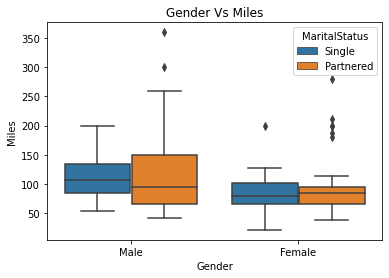

In [ ]:
# Fitness impact due to Usage based on Marital Status
sns.boxplot(data=aero_df, x='Gender', y='Miles', hue='MaritalStatus')
plt.title("Gender Vs Miles")
plt.show()

#### *Miles run seems to be quite stable amongst Males irrespective of their Marital Status. But, there are good number of outliers in female partnered segment.*

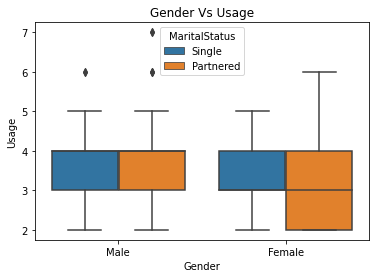

In [ ]:
# Usage based on Marital Status
sns.boxplot(data=aero_df, x='Gender', y='Usage', hue='MaritalStatus')
plt.title("Gender Vs Usage")
plt.show()

#### *On Usage, there is a stable usage of 3 to 4 times a day by Females. But there are outliers amongst Male and that too Male Partnered segment.*

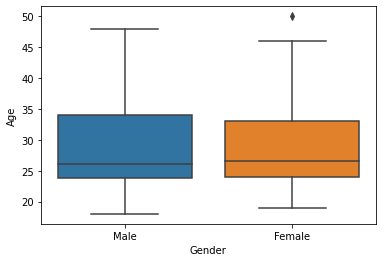

In [ ]:
 sns.boxplot(data=aero_df, x='Gender', y='Age')
 plt.show()

#### *Amongst the purchasers age group the outlier lies in female category.*

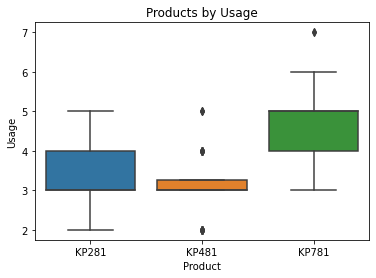

In [ ]:
 sns.boxplot(data=aero_df, x='Product', y='Usage')
 plt.title('Products by Usage')
 plt.show()

#### *The third product KP781 seem to have more frequent usage than others; and the second product KP481 is less used*

In [ ]:
prod_by_age = aero_df[aero_df['Product']=='KP781'].sort_values('Miles', ascending=False)
prod_by_age.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
173,KP781,35,Male,16,Partnered,4,5,92131,360
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
155,KP781,25,Male,18,Partnered,6,5,75946,240
171,KP781,33,Female,18,Partnered,4,5,95866,200
175,KP781,40,Male,21,Single,6,5,83416,200
148,KP781,24,Female,16,Single,5,5,52291,200
142,KP781,22,Male,18,Single,4,5,48556,200
152,KP781,25,Female,18,Partnered,5,5,61006,200


In [ ]:
prod_by_age = aero_df[aero_df['Product']=='KP781'].sort_values('Miles', ascending=False)
prod_by_age.tail(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
150,KP781,25,Male,16,Partnered,4,5,49801,120
140,KP781,22,Male,14,Single,4,3,48658,106
161,KP781,27,Male,21,Partnered,4,4,90886,100
157,KP781,26,Female,21,Single,4,3,69721,100
153,KP781,25,Male,18,Partnered,4,3,64741,100
146,KP781,24,Male,16,Single,4,5,61006,100
145,KP781,23,Male,16,Single,4,5,48556,100
144,KP781,23,Female,18,Single,5,4,53536,100
160,KP781,27,Male,18,Single,4,3,88396,100
147,KP781,24,Male,18,Partnered,4,5,57271,80


#### *The above result set indicate that the product KP781 has got more miles run by 'Partnered' and less miles by 'Singles'*

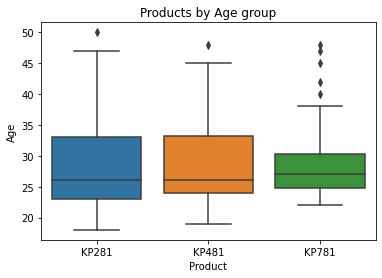

In [ ]:
 sns.boxplot(data=aero_df, x='Product', y='Age')
 plt.title("Products by Age group")
 plt.show()

#### *The first two products seem to be quite popular amongst age groups b/w 25 to 35; whereas the third product attracts higher age group* 

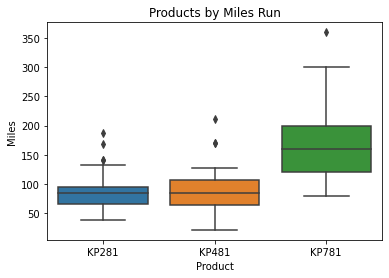

In [ ]:
 sns.boxplot(data=aero_df, x='Product', y='Miles')
 plt.title("Products by Miles Run")
 plt.show()

#### *Interestingly, though the third product KP781 is bought by less number of people, the miles run in it is higher than the other two products*

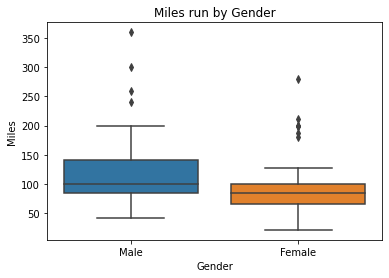

In [ ]:
 sns.boxplot(data=aero_df, x='Gender', y='Miles')
 plt.title("Miles run by Gender")
 plt.show()

#### *this graph shows Males run more miles in the threadmill than Females*

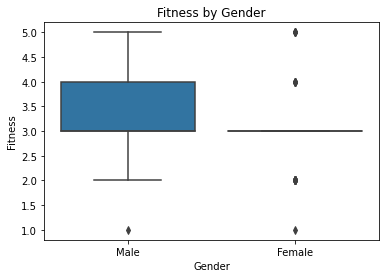

In [ ]:
 sns.boxplot(data=aero_df, x='Gender', y='Fitness')
 plt.title("Fitness by Gender")
 plt.show()

#### *Amongst the gender, Males are of more Fitness freak than Females*

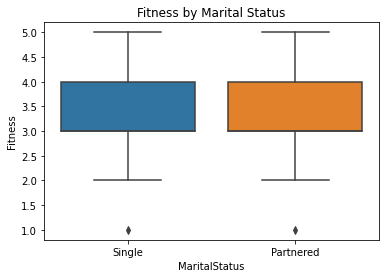

In [ ]:
 sns.boxplot(data=aero_df, x='MaritalStatus', y='Fitness')
 plt.title("Fitness by Marital Status")
 plt.show()

#### *this indicates that both Singles & Partnered seem to be equally Fitness freak*

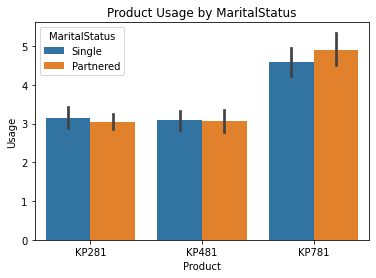

In [ ]:
# Usage based on Marital Status
sns.barplot(data=aero_df, x='Product', y='Usage', hue='MaritalStatus')
plt.title("Product Usage by MaritalStatus")
plt.show()

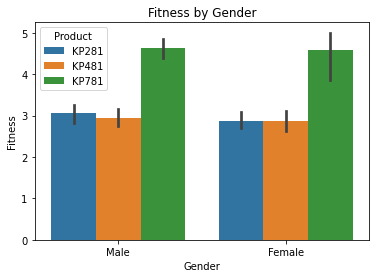

In [ ]:
# Fitness based on Marital Status
sns.barplot(data=aero_df, x='Gender', y='Fitness', hue='Product')
plt.title("Fitness by Gender")
plt.show()

#### *the above graphs indicate that both from Fitness and Usage point of view the third product KP781 seems to be popular amongst both the genders irrespective of marital status*

#### *the other two products are equally used*

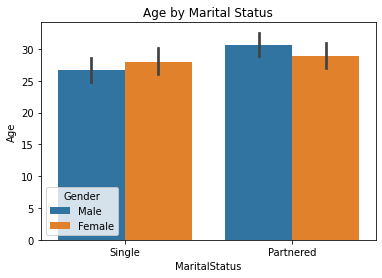

In [ ]:
# Count based on Marital Status & Age
prod_cnt = aero_df['Product'].value_counts()
sns.barplot(data=aero_df, x='MaritalStatus', y='Age', hue='Gender')
plt.title("Age by Marital Status")
plt.show()

#### *Male Singles seem to be younger compared Female Singles from those who purchased Threadmills. On the otherhand Partnered Males are of elder as compared to Partnered Females. This indicates Young females purchase threadmills more and male community buy them after they become partnered.*

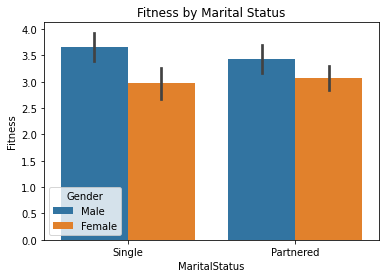

In [ ]:
# Count based on Marital Status & Fitness
prod_cnt = aero_df['Product'].value_counts()
sns.barplot(data=aero_df, x='MaritalStatus', y='Fitness', hue='Gender')
plt.title("Fitness by Marital Status")
plt.show()

#### *Clearly males are more of Fitness oriented. Irrespective of Marital Status females seem to be at average fitness of 3.0*

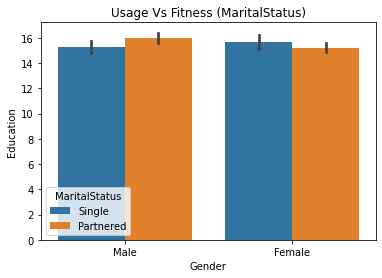

In [ ]:
# Education Vs Gender Vs Marital Status
sns.barplot(data=aero_df, x='Gender', y='Education', hue='MaritalStatus')
plt.title("Usage Vs Fitness (MaritalStatus)")
plt.show()

#### *Amongst the buyers, hightly educated ones are 'Male-Partnered' and 'Female-Singles'.*

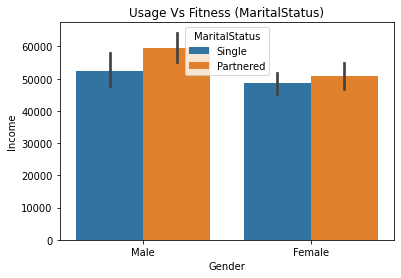

In [ ]:
# Education Vs Gender Vs Marital Status
sns.barplot(data=aero_df, x='Gender', y='Income', hue='MaritalStatus')
plt.title("Usage Vs Fitness (MaritalStatus)")
plt.show()

#### *Amongst the buyers, the top earning segment is Male.*

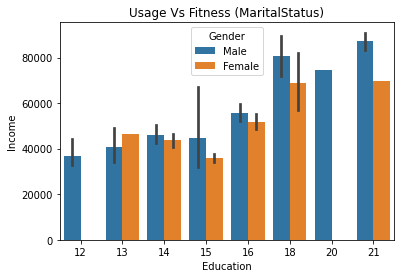

In [ ]:
# Education Vs Gender Vs Marital Status
sns.barplot(data=aero_df, x='Education', y='Income', hue='Gender')
plt.title("Usage Vs Fitness (MaritalStatus)")
plt.show()

#### *this graph clearly indicates Male community topping both in Education & Income amongst the buyers.*

#### *while Male community is present at all Education levels, Females don't seem to have the lower Education (12) and one of the higher education (20)*

# **5. Business Insights**
## From the given dataset and based on the above analysis the following insights are drawn:

*   As can be seen from the data, KP281 is sold more and KP781 is sold less amongst three products
*   The age group who purchased high number of threadmills is between 23 & 26
*   From the buyers list the Male community is large in number than Females
*   Interestingly 'Partnered' category seem to have purchased the Threadmill more than the Singles
*   About 61% females who are partnered have purchased Threadmills. Similarly amongst partnered males percentage is: 59. Amongst the Singles - Male Vs Female percentages are 41% and 39%. This indicates that purchase of Threadmill is higher among male singles compared to female singles; wherease it becomes reverse amongnst 'partnered' community
*   Assuming the given Usage numbers are of number of times usage per day, majority of the customers use 3 times; Usage frequency of 3 or 4 times per day is more than others
*   Interestingly the product KP781 is used 4 or more times a day, but that's the lowest sold among 3 threadmills. The other two products are sold in high numbers but mostly used 3 times a day
*   There is a stable usage of 3 to 4 times a day by Females. But there are outliers amongst Male and that too Male Partnered segment
*   The first product KP281 seems to be popular amongst the age groups 23 to 28
*   The second product KP481 seems to be popular amongst the age groups 25 and 23
*   The third product KP781 seems to be popular amongst the age group 25 and 24
*   This indicates that generally threadmills are mostly bought by the age groups between 23 to 28
*   The Product KP281 is equally purchased by both Male & Females. Amongst the Age group for Male it is 23 & 26; for Female it is 25 & 28
*   More Males have purchased the Product KP481 than Females. Amongst the Age group for both Male & Female it is 25 and 23 who purchased in high numbers
*   Interestingly the product KP781 seems to be highly popular with 75% of Males buying it. Only 25% of females have bought KP781.
*   Correleation indicates high usage & fitness is amongst Male community
*   Correleation indicates high usage & fitness is amongst those who are 'Single'; at the same time, interestingly the top Usage & high Fitness is recorded by 'Partenered'
*   For the product KP281, the more miles are run predominantly by Males
*   Miles run seems to be quite stable amongst Males irrespective of their Marital Status. But, there are good number of outliers in female partnered segment
*   Amongst the purchaser's age group the outlier lies in female category
*   The third product KP781 seem to have more frequent usage than others; and the second product KP481 is less used
*   One of the result set indicates that the product KP781 has got more miles run by 'Partnered' and less miles by 'Singles'
*   The first two products seem to be quite popular amongst age groups b/w 25 to 35; whereas the third product attracts higher age group
*   Interestingly, though the third product KP781 is bought by less number of people, the miles run in it is higher than the other two products
*   this graph shows Males run more miles in the threadmill than Females
*   Amongst the gender, Males are of more Fitness freak than Females
*   Both Singles & Partnered seem to be equally Fitness freak
*   From Fitness and Usage point of view the third product KP781 seems to be popular amongst both the genders irrespective of marital status. The other two products are equally less used
*   Male Singles seem to be younger compared Female Singles from those who purchased Threadmills. On the otherhand Partnered Males are more elder than Partnered Females. This indicates Young females purchase threadmills more and male community buy them after they become partnered
*   Clearly males are more of Fitness oriented. Irrespective of Marital Status females seem to be at average fitness of 3.0
*   Amongst the buyers, hightly educated ones are 'Male-Partnered' and 'Female-Singles'
*   Amongst the buyers, the top earning segment is Male
*   Male community tops both in Education & Income amongst the buyers
*   while Male community is present in all Education levels, Females don't seem to present in the lower Education (12) and one of the higher education (20) segments.




















# **6. Recommendations & Conclusion**
## The closer look at the existing customers and the detailed analysis of given parameters have helped in deriving the below recommendations:

*   **Product Type**: The product 'KP781' is more frequently used and those who 
    have used have higher % of Fitness. But it has less sales compared to other 
    two products
    > Special features of 'KP781' can be highlighted prominently in the 
      marketing to attract more sales

    > Product 'KP281' sold in more numbers. So, it's product features can be
      more highlighted and sale numbers can be pubished to induce more buyers

    > Introduce 'Friends & Family' referral discount program to increase the sales of products like 'KP481' and 'KP781'
    

*   **Age-Group**: High # of current customers fall in age group b/w 23 to 28. 
    > Special promotions like Student/Sportsman/Youth Package can be introduced 
      to attract more customers in this segment

    > For the other age group customers, seasonal discounts can be given

*   **Education & Income Segment**: Male community tops both in Education & 
    Income amongst the buyers
    > Special programs like 'Graduation day' discount, 'Salary day' discount 
      can be offered to reward this particular segment
    
    > Uniquely designed discounts can be offered Female community to attract 
      more purchases  
    
    > Especially the females at the Education category (12) and (20) can be 
      given speical discounts as this segment is an untapped space
      
*   **Gender & Marital Status**: Male customers are higher than female.
    > Uniquely designed products for female community will help. For eg: 
      features like, more softer handles, video screen in the center area to 
      watch their favorite programs, cell phone holders with ease of access, 
      etc., will help  
    
    > There should be always an added discount % of price for female
    
    > Special 'wedding day' discount can be given for couples

    > Offer best 'Male ally' discount to those who buy product for their spouse
    
    > Conduct Qly/Hly/Annual events like half/full marathon with the customers and reward them with T-Shirts, goodies, etc.,

*   **High Usage & Fitness Category**: From the given data it is evident that 
    males are using the threadmills higher than females and their fitness also 
    high.
    > Introduce systems like 'Elite/Premium' membership, Credit points and 
      things like that to recognize the high usage, more miles & fitness 
    
    > Supplement with add-ons to attract new customers
    
    > Free 'fitness classes' can be offered 

    > Reward the customers with consistent usage and those who maintain the streak 
    




---



---

